This machine learning model will be able to predict the next data sp500 index price



In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# importing package that will call the api to download the the market prices
import yfinance as yf

In [3]:
# intilizing a ticker class to help in getting prices fro a single symbol
sp_data = yf.Ticker("^GSPC")


In [4]:
#Querying historical prices
sp_data = sp_data.history(period="max")


In [5]:
sp_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,0,0
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,0,0
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,0,0
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,0,0
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,0,0
...,...,...,...,...,...,...,...
2022-08-19,4266.310059,4266.310059,4218.700195,4228.479980,3210680000,0,0
2022-08-22,4195.080078,4195.080078,4129.859863,4137.990234,3365220000,0,0
2022-08-23,4133.089844,4159.770020,4124.029785,4128.729980,3117800000,0,0


### Cleaning and visualization

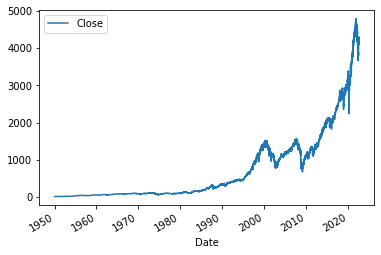

In [6]:
# Visualizing the data
sp_data.plot.line(y='Close', use_index = True)

In [7]:
# removing columns tha twe don't need
del sp_data['Dividends']
del sp_data['Stock Splits']

In [8]:
# creating a new column that will be have prices for the next day
sp_data['Tomorrow'] = sp_data['Close'].shift(-1)

In [9]:
sp_data

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001
...,...,...,...,...,...,...
2022-08-19,4266.310059,4266.310059,4218.700195,4228.479980,3210680000,4137.990234
2022-08-22,4195.080078,4195.080078,4129.859863,4137.990234,3365220000,4128.729980
2022-08-23,4133.089844,4159.770020,4124.029785,4128.729980,3117800000,4140.770020


In [10]:
# Creating a target column
sp_data['Target'] = (sp_data['Tomorrow']> sp_data['Close']).astype(int)

In [11]:
sp_data

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1950-01-03,16.660000,16.660000,16.660000,16.660000,1260000,16.850000,1
1950-01-04,16.850000,16.850000,16.850000,16.850000,1890000,16.930000,1
1950-01-05,16.930000,16.930000,16.930000,16.930000,2550000,16.980000,1
1950-01-06,16.980000,16.980000,16.980000,16.980000,2010000,17.080000,1
1950-01-09,17.080000,17.080000,17.080000,17.080000,2520000,17.030001,0
...,...,...,...,...,...,...,...
2022-08-19,4266.310059,4266.310059,4218.700195,4228.479980,3210680000,4137.990234,0
2022-08-22,4195.080078,4195.080078,4129.859863,4137.990234,3365220000,4128.729980,0
2022-08-23,4133.089844,4159.770020,4124.029785,4128.729980,3117800000,4140.770020,1


In [12]:
# Removing all data before 1990 because market shift fundamentally and old data isn't useful
sp_data = sp_data.loc['1990-01-01':].copy()


### training an initial model

In [13]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)
train = sp_data.iloc[:-100]
test = sp_data.iloc[-100:]

predictors = ['Close','Volume','Open','High','Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score
preds = model.predict(test[predictors])

In [15]:
# converting array into pandas series
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [16]:
precision_score(test['Target'],preds)

0.4659090909090909

- 46% is quite low

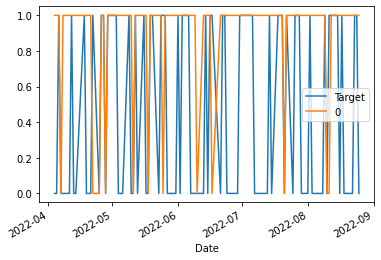

In [17]:
# comnining our predicted values and target values and plotting them
combined = pd.concat([test['Target'],preds], axis=1)
combined.plot()

- Here our model predicted that prices would go up it was contrary

### Building a backtesting system


In [18]:
"""Creating prediction function which is just
 a rub up of everythng i have done"""

def predict(train,test, predictors,model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors])
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'],preds], axis=1)
  return combined



In [22]:
#a backtest function
def backtest(data,model, predictors, start=2500, step=250):
  all_predictions = []

  # looping through our data
  for i in range(start, data.shape[0], step):
    train = data.iloc[0:i].copy()
    test = data.iloc[i:(i+step)].copy()
    predictions = predict(train,test,predictors,model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)



In [23]:
# backest the sp_data with model we created earlier and also predictors
predictions = backtest(sp_data, model, predictors)

In [25]:
predictions['Predictions'].value_counts()

0    3337
1    2390
Name: Predictions, dtype: int64

In [26]:
precision_score(predictions['Target'], predictions['Predictions'])

0.5351464435146444

In [28]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.536232
0    0.463768
Name: Target, dtype: float64

### adding additional predictors to our model

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
  rolling_averanges = sp_data.rolling(horizon).mean()

  ratio_column = f"Close_Ratio_{horizon}"
  sp_data[ratio_column] = sp_data['Close'] / rolling_averanges["Close"]

  trend_column = f"Trend_{horizon}"
  sp_data[trend_column] = sp_data.shift(1).rolling(horizon).sum()["Target"]

  new_predictors += [ratio_column, trend_column]

In [42]:
sp_data

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-15,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-16,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1993-12-17,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
1993-12-20,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.003784,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-18,4273.129883,4292.529785,4261.979980,4283.740234,2871990000,4228.479980,0,1.001133,0.998994,1.074681,0.984576,1.214425,1.0,4.0,29.0,124.0,546.0
2022-08-19,4266.310059,4266.310059,4218.700195,4228.479980,3210680000,4137.990234,0,0.993508,0.988489,1.059547,0.972100,1.198312,1.0,3.0,29.0,123.0,545.0
2022-08-22,4195.080078,4195.080078,4129.859863,4137.990234,3365220000,4128.729980,0,0.989184,0.974587,1.036183,0.951601,1.172258,0.0,2.0,28.0,122.0,545.0


In [43]:
#drop NAN values
sp_data = sp_data.dropna()

In [44]:
sp_data

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26,950.820007,956.469971,950.820007,951.640015,487750000,955.400024,1,1.000431,0.997275,1.009111,1.113282,1.517046,2.0,4.0,33.0,138.0,563.0
1997-11-28,951.640015,959.130005,951.640015,955.400024,189070000,974.770020,1,1.001972,1.001967,1.012659,1.116599,1.521842,2.0,4.0,33.0,139.0,564.0
1997-12-01,955.400024,974.770020,955.400024,974.770020,590300000,971.679993,0,1.010035,1.019783,1.032356,1.138015,1.551433,2.0,4.0,34.0,140.0,564.0
1997-12-02,974.780029,976.200012,969.830017,971.679993,576120000,976.770020,1,0.998412,1.011259,1.028349,1.133204,1.545272,1.0,4.0,33.0,140.0,563.0
1997-12-03,971.679993,980.809998,966.159973,976.770020,624610000,973.099976,0,1.002612,1.011095,1.032949,1.137882,1.552105,1.0,4.0,33.0,141.0,564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-18,4273.129883,4292.529785,4261.979980,4283.740234,2871990000,4228.479980,0,1.001133,0.998994,1.074681,0.984576,1.214425,1.0,4.0,29.0,124.0,546.0
2022-08-19,4266.310059,4266.310059,4218.700195,4228.479980,3210680000,4137.990234,0,0.993508,0.988489,1.059547,0.972100,1.198312,1.0,3.0,29.0,123.0,545.0
2022-08-22,4195.080078,4195.080078,4129.859863,4137.990234,3365220000,4128.729980,0,0.989184,0.974587,1.036183,0.951601,1.172258,0.0,2.0,28.0,122.0,545.0


### Improving our model

In [45]:
model = RandomForestClassifier(n_estimators=200,min_samples_split=50, random_state=1)

In [48]:
def predict(train,test, predictors,model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]
  preds[preds >= .6] = 1
  preds[preds < .6] = 0
  preds = pd.Series(preds, index=test.index, name='Predictions')
  combined = pd.concat([test['Target'],preds], axis=1)
  return combined

In [49]:
predictions = backtest(sp_data, model, new_predictors)

In [51]:
predictions['Predictions'].value_counts()

0.0    3190
1.0     536
Name: Predictions, dtype: int64

In [52]:
precision_score(predictions["Target"], predictions['Predictions'])

0.5634328358208955

- facroring that we were using daily data my model is quite fair but cannot be used for daily trading.
- One can improve the model by:
  - factoring that exchanges happen night before USA market opens and it can be important if you query them also
  - adding components like general macroeconomic conditions
  - adding sp500 components like keystocks and keysectors
  - increasing resolution by querying data hourly, by minite or seconds